# Classification des Pinguoins

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #simple data visualization

## Ouverture du fichier de jeu de donnée

**Nom de la variable :** df 

**Nom du fichier :** penguins_size_Ptech.csv

Utiliser la fonction **read_csv** 

Attention sous Windows à rajouter r

Exemple : 
- r'c:\path'
- Out => 'c:\\path

La variable à définir est df

## Information sur le jeu de donnée

In [4]:
print('Dataset has', df.shape[0] , 'rows and', df.shape[1], 'columns')

Dataset has 344 rows and 7 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Il y a 5 informations contenues dans le jeu de données:
- Culmen Length (mm)
- Culmen Depth (mm)
- Flipper Length (mm)
- Body Mass (g)
- Island (Ile)

**Une classe :** species


In [7]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Que voyez-vous ?

## Préparation des données

Comment retrouver le nombre d'élement nul par variable dans le jeu de données.
En utilisant ce site, trouvez la fonction à executer :
https://www.miamioh.edu/cads/students/coding-tutorials/python/data-cleaning/index.html#:~:text=in%20the%20data.-,The%20function%20dataframe.,missing%20values%20in%20the%20dataset.

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

il est donc nécessaire de travailler sur quelles variables ?

Faut-il en rajouter dans la section suivante ??

In [16]:
new_df = df.copy()

new_df['culmen_length_mm'].fillna(np.mean(df['culmen_length_mm']), inplace = True)

new_df['sex'].fillna(df['sex'].mode()[0], inplace = True)

In [17]:
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [18]:
new_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Il faut maintenant normaliser les données

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
new_df['culmen_length_mm'] = mms.fit_transform(new_df['culmen_length_mm'].values.reshape(-1, 1))
new_df['culmen_depth_mm'] = mms.fit_transform(new_df['culmen_depth_mm'].values.reshape(-1, 1))
new_df['flipper_length_mm'] = mms.fit_transform(new_df['flipper_length_mm'].values.reshape(-1, 1))
new_df['body_mass_g'] = mms.fit_transform(new_df['body_mass_g'].values.reshape(-1, 1))
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,MALE
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


In [20]:
new_df_dummy = pd.get_dummies(new_df, columns = ['sex', 'island'], drop_first = True)

In [21]:
new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)


In [22]:
new_df_dummy.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Dream,island_Torgersen
0,0,0.254545,0.666667,0.152542,0.291667,0,1,0,1
1,0,0.269091,0.511905,0.237288,0.305556,1,0,0,1
2,0,0.298182,0.583333,0.389831,0.152778,1,0,0,1
3,0,0.429888,0.482282,0.490088,0.417154,0,1,0,1
4,0,0.167273,0.738095,0.355932,0.208333,1,0,0,1


In [23]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = new_df_dummy.drop(columns = ['species', 'sex_FEMALE', 'sex_MALE'])
Y = new_df_dummy['species']

## Split des données 

A renseigner

In [24]:
X_train, X_test, Y_train, Y_test = 

## Entrainement

In [27]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,Y_train)
    training_accuracy.append(clf.score(X_train,Y_train))
    test_accuracy.append(clf.score(X_test,Y_test))

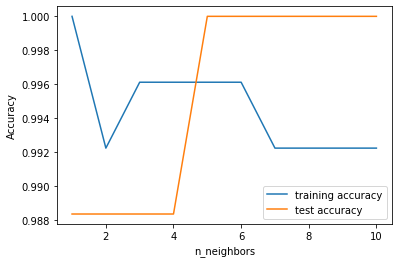

In [28]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label= "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [29]:
type_pingouin = LR.predict([[0.498182,0.178571,0.644068,0.416667,0,0]])

if (type_pingouin==0):
    print("Pingouin : Adelie")
if (type_pingouin==1):
    print("Pingouin : Chinstrap")
if (type_pingouin==2):
    print("Pingouin : Gentoo")

Pingouin : Gentoo


## Trouvez l'information sur le pingouin de la présentation.